In [1]:
#!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/train/train.csv')

In [3]:
train_df.dtypes

id                 int64
sentence          object
subject_entity    object
object_entity     object
label             object
source            object
dtype: object

In [4]:
train_df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [5]:
#train_label 별 개수 확인인
group = train_df['label'].value_counts()
group

no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

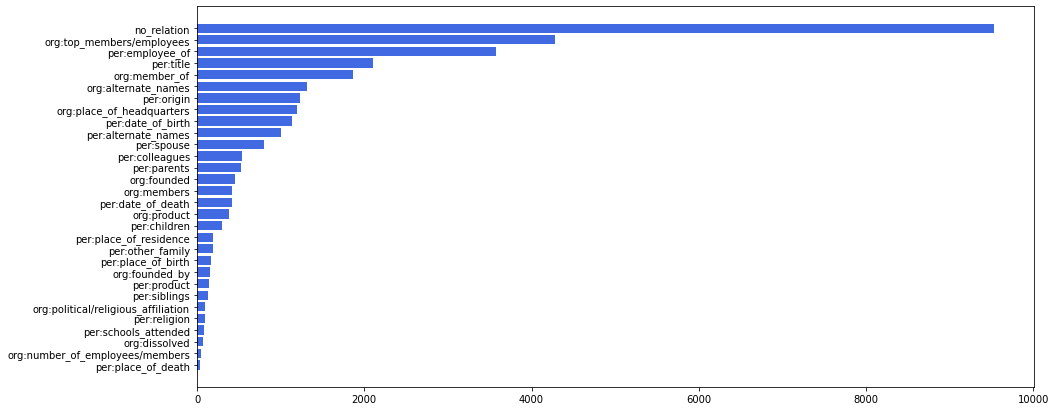

In [6]:
#간단한 비율 확인 EDA
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
axes.barh(group.index[::-1], group[::-1],color='royalblue')

plt.show()

In [15]:
#train라벨별 추출할 valid 개수 계산
valid_count = {}
valid_ratio = 0.2
for x, y in group.items() :
  print(f'{x:40} : {y:5},  ratio : {y / len(train_df) : .5f} , valid_count :  { int(int(len(train_df) * valid_ratio) * (y / len(train_df)))} ' )
  valid_count[x] = int(int(32470 * 0.2) * (y / len(train_df)))

no_relation                              :  9534,  ratio :  0.29362 , valid_count :  1906 
org:top_members/employees                :  4284,  ratio :  0.13194 , valid_count :  856 
per:employee_of                          :  3573,  ratio :  0.11004 , valid_count :  714 
per:title                                :  2103,  ratio :  0.06477 , valid_count :  420 
org:member_of                            :  1866,  ratio :  0.05747 , valid_count :  373 
org:alternate_names                      :  1320,  ratio :  0.04065 , valid_count :  264 
per:origin                               :  1234,  ratio :  0.03800 , valid_count :  246 
org:place_of_headquarters                :  1195,  ratio :  0.03680 , valid_count :  239 
per:date_of_birth                        :  1130,  ratio :  0.03480 , valid_count :  226 
per:alternate_names                      :  1001,  ratio :  0.03083 , valid_count :  200 
per:spouse                               :   795,  ratio :  0.02448 , valid_count :  159 
per:colle

In [16]:
#추출전 데이터 shuffle
train_df = train_df.sample(frac=1)

In [18]:
#새로운 dataFrame 정의의
new_valid_df = pd.DataFrame(columns=['id','sentence','subject_entity','object_entity','label','source'])
new_train_df = pd.DataFrame(columns=['id','sentence','subject_entity','object_entity','label','source'])
for idx, item in train_df.iterrows():
  #print(item['id'], item['label'])
  if valid_count[item['label']] > 0 :
    valid_count[item['label']] = valid_count[item['label']] - 1
    new_valid_df.loc[idx]=item
  else :
    new_train_df.loc[idx]=item

In [19]:
#새로운 train_df, valid_df 길이 계산
print( f'train_df len : {len(new_train_df)}')
print( f'valid_df len ; {len(new_valid_df)}')

train_df len : 25986
valid_df len ; 6484


In [20]:
#dict 타입 변수에 저장한 데이터 전부 추출되었는지 확인
sum(valid_count.values())

0

In [21]:
#train_ valid id types 변경
new_valid_df = new_valid_df.astype({'id':'int64'})
new_train_df = new_train_df.astype({'id':'int64'})

In [22]:
new_train_df.dtypes

id                 int64
sentence          object
subject_entity    object
object_entity     object
label             object
source            object
dtype: object

In [23]:
new_valid_df.dtypes

id                 int64
sentence          object
subject_entity    object
object_entity     object
label             object
source            object
dtype: object

In [24]:
new_train_df.head()

,id,sentence,subject_entity,object_entity,label,source
244,244,"또한 비문에는 사무드라굽타가 비슈누파 힌두교 신자라는 내용이 언급되어 있는데, 비문...","{'word': '사무드라굽타', 'start_idx': 52, 'end_idx':...","{'word': '힌두교', 'start_idx': 21, 'end_idx': 23...",per:religion,wikipedia
27079,27079,1612년 9월 12일 고스티닌 성에서 사망했으며 1635년 러시아 차르국의 차르였...,"{'word': '바실리 4세', 'start_idx': 63, 'end_idx':...","{'word': '고스티닌 성', 'start_idx': 13, 'end_idx':...",per:place_of_death,wikipedia
31344,31344,"퀘이커는 영국 정부에 의해 탄압받았으나, 퀘이커 신도 윌리엄 펜이 불하받은 북아메리...","{'word': '윌리엄 펜', 'start_idx': 30, 'end_idx': ...","{'word': '퀘이커', 'start_idx': 23, 'end_idx': 25...",per:religion,wikipedia
13518,13518,대한민국에서는 1999년 '향기 나는 양복'을 개발한 FnC 코오롱의 권혁호씨가 환...,"{'word': '문선명', 'start_idx': 76, 'end_idx': 78...","{'word': '통일교', 'start_idx': 72, 'end_idx': 74...",per:religion,wikipedia
2398,2398,헤이안 시대에는 당나라 유학 승려 출신인 사이초와 구카이가 각각 천태종과 진언종을 ...,"{'word': '사이초', 'start_idx': 23, 'end_idx': 25...","{'word': '천태종', 'start_idx': 36, 'end_idx': 38...",per:religion,wikipedia


In [25]:
new_valid_df.head()

,id,sentence,subject_entity,object_entity,label,source
25484,25484,"이듬해 1991년 4월 15일에 평화민주당을 신민주연합당으로 확대, 재개편한 후 당...","{'word': '신민주연합', 'start_idx': 25, 'end_idx': ...","{'word': '민주당', 'start_idx': 20, 'end_idx': 22...",no_relation,wikipedia
158,158,지난 5일 SBS 보도에 따르면 최근 서수길 대표는 아프리카TV BJ 김인호(김영진...,"{'word': '아프리카TV', 'start_idx': 29, 'end_idx':...","{'word': '서수길', 'start_idx': 21, 'end_idx': 23...",org:top_members/employees,wikitree
27453,27453,1422년 잉글랜드의 헨리 5세와 프랑스의 샤를 6세가 잇달아 죽자 나이 어린 헨리...,"{'word': '샤를 6세', 'start_idx': 24, 'end_idx': ...","{'word': '샤를 7세', 'start_idx': 93, 'end_idx': ...",per:children,wikipedia
1148,1148,"그는 리처드 도킨스 (Richard Dawkins), 크리스토퍼 히친스 (Chris...","{'word': '도킨스', 'start_idx': 7, 'end_idx': 9, ...","{'word': '무신론', 'start_idx': 92, 'end_idx': 94...",per:religion,wikipedia
25718,25718,"양커는 TSG 비스마르 (TSG Wismar), 한자 로스토크, 1. FC 쾰른에서...","{'word': '1. FC 쾰른', 'start_idx': 74, 'end_idx...","{'word': '분데스리가', 'start_idx': 67, 'end_idx': ...",org:member_of,wikipedia


In [26]:
#중복 index 확인
train_id = new_train_df['id'].tolist()
valid_id = new_valid_df['id'].tolist()

print("중복인덱스 확인 : " , len(set(train_id) & set(valid_id)) == 0 )
print("총개수 확인 :" , (len(train_id) + len(valid_id)) == len(train_df) ) #train_df와 개수 같은지 확인


중복인덱스 확인 :  True
총개수 확인 : True


In [27]:
#새로운 train 라벨별 개수 확인
new_train_group = new_train_df['label'].value_counts()
new_train_group

no_relation                            7628
org:top_members/employees              3428
per:employee_of                        2859
per:title                              1683
org:member_of                          1493
org:alternate_names                    1056
per:origin                              988
org:place_of_headquarters               956
per:date_of_birth                       904
per:alternate_names                     801
per:spouse                              636
per:colleagues                          428
per:parents                             416
org:founded                             360
org:members                             336
per:date_of_death                       335
org:product                             304
per:children                            244
per:place_of_residence                  155
per:other_family                        152
per:place_of_birth                      133
org:founded_by                          124
per:product                     

In [28]:
#새로운 valid 라벨별 개수 확인
new_valid_group = new_valid_df['label'].value_counts()
new_valid_group

no_relation                            1906
org:top_members/employees               856
per:employee_of                         714
per:title                               420
org:member_of                           373
org:alternate_names                     264
per:origin                              246
org:place_of_headquarters               239
per:date_of_birth                       226
per:alternate_names                     200
per:spouse                              159
per:colleagues                          106
per:parents                             104
org:founded                              90
org:members                              84
per:date_of_death                        83
org:product                              76
per:children                             60
per:other_family                         38
per:place_of_residence                   38
per:place_of_birth                       33
org:founded_by                           31
per:product                     

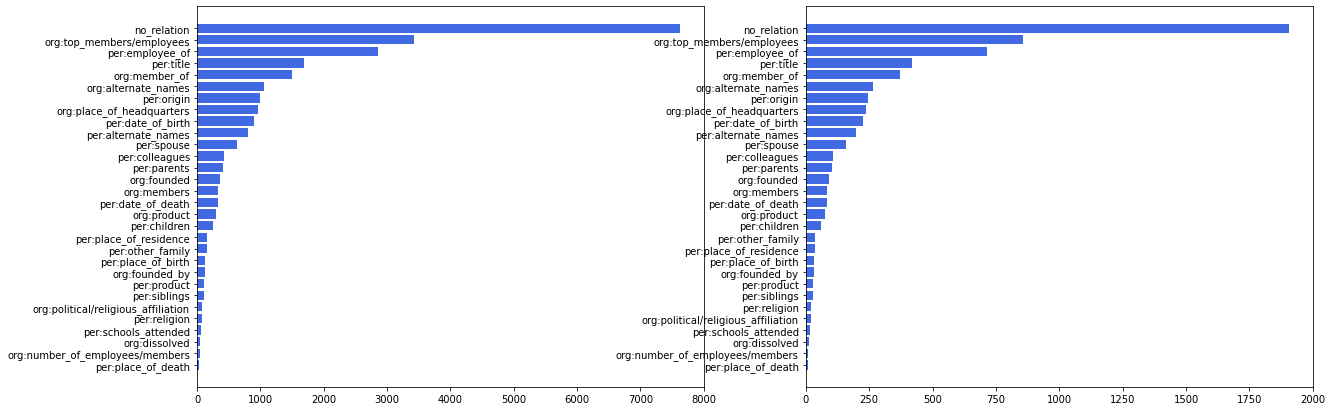

In [29]:
#새로운 train , valid 비율 EDA
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].barh(new_train_group.index[::-1], new_train_group[::-1],color='royalblue')
axes[1].barh(new_valid_group.index[::-1], new_valid_group[::-1],color='royalblue')
plt.show()

In [30]:
#csv 파일저장 , index 제거 및 utf-8 encoding
new_train_df.to_csv('./new_train.csv',index=False, encoding = 'utf-8')
new_valid_df.to_csv('./new_valid.csv',index=False, encoding = 'utf-8')